<a href="https://colab.research.google.com/github/karsarobert/Deep-Learning-2022/blob/main/11/PTE_DL11_W2V.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning gyakorlat


## 11. gyakorlat: word2vec
### 2022. november 23.

In [ ]:
import numpy as np
from gensim.models import KeyedVectors
import gensim.downloader as api
import gensim

%matplotlib inline

In [ ]:
apple = en_w2v.get_vector('apple')

In [ ]:
len(apple)

300

In [ ]:
word_vectors = api.load("glove-wiki-gigaword-100")

In [ ]:
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [ ]:
apple = word_vectors.get_vector('apple')
pear  = word_vectors.get_vector('pear')
dog   = word_vectors.get_vector('dog')
hotel = word_vectors.get_vector('hotel')
motel = word_vectors.get_vector('motel')
bird = word_vectors.get_vector('bird')
len(apple), len(pear), len(dog)

(100, 100, 100)

In [ ]:
apple

array([-0.5985   , -0.46321  ,  0.13001  , -0.019576 ,  0.4603   ,
       -0.3018   ,  0.8977   , -0.65634  ,  0.66858  , -0.49164  ,
        0.037557 , -0.050889 ,  0.6451   , -0.53882  , -0.3765   ,
       -0.04312  ,  0.51384  ,  0.17783  ,  0.28596  ,  0.92063  ,
       -0.49349  , -0.48583  ,  0.61321  ,  0.78211  ,  0.19254  ,
        0.91228  , -0.055596 , -0.12512  , -0.65688  ,  0.068557 ,
        0.55629  ,  1.611    , -0.0073642, -0.48879  ,  0.45493  ,
        0.96105  , -0.063369 ,  0.17432  ,  0.9814   , -1.3125   ,
       -0.15801  , -0.54301  , -0.13888  , -0.26146  , -0.3691   ,
        0.26844  , -0.24375  , -0.19484  ,  0.62583  , -0.7377   ,
        0.38351  , -0.75004  , -0.39053  ,  0.091498 , -0.36591  ,
       -1.4715   , -0.45228  ,  0.2256   ,  1.1412   , -0.38526  ,
       -0.06716  ,  0.57288  , -0.39191  ,  0.31302  , -0.29235  ,
       -0.96157  ,  0.15154  , -0.21659  ,  0.25103  ,  0.096967 ,
        0.2843   ,  1.4296   , -0.50565  , -0.51374  , -0.4721

In [ ]:
def cosine_similarity(v1, v2):
    sim = np.dot(v1, v2)/(np.linalg.norm(v1)*np.linalg.norm(v2))
    return np.round(sim, 4)

In [ ]:
cosine_similarity(apple, pear), cosine_similarity(apple, dog), cosine_similarity(pear, dog), 

(0.589, 0.2723, 0.1634)

In [ ]:
cosine_similarity(motel, hotel), cosine_similarity(motel, dog), cosine_similarity(hotel, dog), cosine_similarity(motel, apple)

(0.7057, 0.3039, 0.2527, 0.1058)

In [ ]:
print('apple-pear:', cosine_similarity(apple, pear))
print('apple-dog:', cosine_similarity(apple, dog))
print('pear-dog:', cosine_similarity(pear, dog))

apple-pear: 0.589
apple-dog: 0.2723
pear-dog: 0.1634


In [ ]:
cosine_similarity(word_vectors.get_vector('king')-word_vectors.get_vector('queen'), 
                  word_vectors.get_vector('man')-word_vectors.get_vector('woman'))

0.451

# queen = (king - man) + woman

In [ ]:
word_vectors.most_similar(positive=['king', 'woman'], negative=['man'], topn=5)

[('queen', 0.7698541283607483),
 ('monarch', 0.6843380928039551),
 ('throne', 0.6755735874176025),
 ('daughter', 0.6594556570053101),
 ('princess', 0.6520534753799438)]

# Vector műveletek:

carrots−carrot=cats−cat
 
carrots=carrot+cats−cat

In [ ]:
word_vectors.most_similar(positive=['cats', 'carrot'], negative=['cat'], topn=5)

[('carrots', 0.7291209697723389),
 ('celery', 0.6493768692016602),
 ('radishes', 0.5637862086296082),
 ('parsnips', 0.5589133501052856),
 ('turnips', 0.5551186800003052)]

In [ ]:
word_vectors.most_similar('mozart', topn=5)

[('beethoven', 0.8112685680389404),
 ('haydn', 0.7675303220748901),
 ('brahms', 0.7464078664779663),
 ('bach', 0.7307978868484497),
 ('concerto', 0.718665599822998)]

In [ ]:
word_vectors.most_similar(positive=['footballer', 'mozart'], negative=['messi'], topn=5)

[('composer', 0.591992974281311),
 ('violin', 0.5915796756744385),
 ('clarinet', 0.5499356389045715),
 ('concerto', 0.5435993671417236),
 ('piano', 0.5414473414421082)]

In [ ]:
word_vectors.most_similar(positive=['sushi', 'italy'], negative=['japan'], topn=5)

[('tapas', 0.6232484579086304),
 ('chefs', 0.6036166548728943),
 ('pasta', 0.5818784236907959),
 ('chef', 0.5807684659957886),
 ('dessert', 0.5793001055717468)]

In [ ]:
word_vectors.most_similar(positive=['sushi', 'hungary'], negative=['japan'], topn=5)

[('pancakes', 0.545518159866333),
 ('lasagna', 0.5213277339935303),
 ('gravy', 0.513271689414978),
 ('bistro', 0.5092968940734863),
 ('dessert', 0.5028696060180664)]

In [ ]:
word_vectors.most_similar("goulash")

[('cassoulet', 0.602324903011322),
 ('oxtail', 0.5868507623672485),
 ('minestrone', 0.5722009539604187),
 ('lentil', 0.5520806312561035),
 ('consomme', 0.5516890287399292),
 ('tripe', 0.5477982759475708),
 ('stews', 0.5284079909324646),
 ('stew', 0.5281815528869629),
 ('casseroles', 0.5251286029815674),
 ('gazpacho', 0.5239716172218323)]

In [ ]:
word_vectors.doesnt_match('germany hungary slovakia usa france italy'.split())

'usa'

In [ ]:
word_vectors.doesnt_match('einstein hawking darwin bohr curie tesla'.split())

'darwin'

In [ ]:
word_vectors.doesnt_match('einstein hawking darwin bohr curie tesla'.split())

'darwin'

In [ ]:
word_vectors.doesnt_match('physics mathematics chemistry biology history'.split())

'history'

In [ ]:
from gensim.summarization import keywords

In [ ]:
text = '''The new coronavirus variant Omicron has been detected in 13 people who arrived in the Dutch capital Amsterdam on two flights from South Africa. They are among 61 passengers who tested positive for coronavirus.
It comes as tighter restrictions come into force in the Netherlands, amid record Covid cases and concerns over the new variant. This includes early closing times for hospitality and cultural venues, and limits on home gatherings.
Omicron was first reported to the World Health Organization (WHO) by South Africa on Wednesday, and early evidence suggests it has a higher re-infection risk. It has been categorised by the WHO as a "variant of concern".
But after many countries around the world restrict travel from southern African countries over the variant, South African President Cyril Ramaphosa called for the bans to be urgently lifted.
In an address to the nation on Sunday he said the moves were unjustified and not based on science.'''

In [ ]:
print(keywords(text))


restrictions
restrict
african
variant
early
capital
south
amid
covid


In [ ]:
results = word_vectors.most_similar(positive=['rupee', 'japan'], negative=['india'])

In [ ]:
results

[('peso', 0.7143093943595886),
 ('yen', 0.6601356267929077),
 ('dollar', 0.6416549682617188),
 ('drachma', 0.6304432153701782),
 ('greenback', 0.6244412660598755),
 ('ruble', 0.6096675992012024),
 ('renminbi', 0.6056637763977051),
 ('currency', 0.5956889390945435),
 ('devaluation', 0.5909512042999268),
 ('currencies', 0.5899966955184937)]

#Más word2vec modellek

In [ ]:
!gdown --id 11QC_ORd8ixR1kmA0WtA7RcFju4Xmh2A9


/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=11QC_ORd8ixR1kmA0WtA7RcFju4Xmh2A9
To: /content/GoogleNews-vectors-negative300.bin
100% 3.64G/3.64G [00:40<00:00, 90.1MB/s]


In [ ]:
%%time
en_w2v = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)

CPU times: user 41.9 s, sys: 5.25 s, total: 47.2 s
Wall time: 48.6 s


In [ ]:
!wget http://corpus.nytud.hu/efnilex-vect/data/hunembed0.0.tgz

--2022-11-22 17:40:08--  http://corpus.nytud.hu/efnilex-vect/data/hunembed0.0.tgz
Resolving corpus.nytud.hu (corpus.nytud.hu)... 193.6.194.65
Connecting to corpus.nytud.hu (corpus.nytud.hu)|193.6.194.65|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3745412991 (3.5G) [application/x-gzip]
Saving to: ‘hunembed0.0.tgz’

hunembed0.0.tgz     100%[===================>]   3.49G  24.3MB/s    in 2m 27s  

2022-11-22 17:42:35 (24.4 MB/s) - ‘hunembed0.0.tgz’ saved [3745412991/3745412991]



In [ ]:
!tar -xvf hunembed0.0.tgz # 10 Gb colab nem tudja kezelni

word2vec-mnsz2-webcorp_600_w10_n5_i1_m10.w2v


In [ ]:
hun_w2v = KeyedVectors.load_word2vec_format('word2vec-mnsz2-webcorp_600_w10_n5_i1_m10.w2v')

In [ ]:
alma = hun_w2v.get_vector('alma')

In [ ]:
!wget http://www.inf.u-szeged.hu/~szantozs/fasttext/hu.szte.w2v.bin

--2022-11-22 18:02:25--  http://www.inf.u-szeged.hu/~szantozs/fasttext/hu.szte.w2v.bin
Resolving www.inf.u-szeged.hu (www.inf.u-szeged.hu)... 160.114.37.229
Connecting to www.inf.u-szeged.hu (www.inf.u-szeged.hu)|160.114.37.229|:80... failed: Connection timed out.
Retrying.

--2022-11-22 18:04:36--  (try: 2)  http://www.inf.u-szeged.hu/~szantozs/fasttext/hu.szte.w2v.bin
Connecting to www.inf.u-szeged.hu (www.inf.u-szeged.hu)|160.114.37.229|:80... failed: Connection timed out.
Retrying.

--2022-11-22 18:06:48--  (try: 3)  http://www.inf.u-szeged.hu/~szantozs/fasttext/hu.szte.w2v.bin
Connecting to www.inf.u-szeged.hu (www.inf.u-szeged.hu)|160.114.37.229|:80... failed: Connection timed out.
Retrying.

--2022-11-22 18:09:00--  (try: 4)  http://www.inf.u-szeged.hu/~szantozs/fasttext/hu.szte.w2v.bin
Connecting to www.inf.u-szeged.hu (www.inf.u-szeged.hu)|160.114.37.229|:80... failed: Connection timed out.
Retrying.

--2022-11-22 18:11:16--  (try: 5)  http://www.inf.u-szeged.hu/~szantozs/fast

In [ ]:
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
 
import seaborn as sns
sns.set_style("darkgrid")

In [ ]:
def tsnescatterplot(model, word, list_names):
    """ Plot in seaborn the results from the t-SNE dimensionality reduction algorithm of the vectors of a query word,
    its list of most similar words, and a list of words.
    """
    arrays = np.empty((0, 100), dtype='f')
    word_labels = [word]
    color_list  = ['red']

    # adds the vector of the query word
    arrays = np.append(arrays, model.wv.__getitem__([word]), axis=0)
    
    # gets list of most similar words
    close_words = model.wv.most_similar([word])
    
    # adds the vector for each of the closest words to the array
    for wrd_score in close_words:
        wrd_vector = model.wv.__getitem__([wrd_score[0]])
        word_labels.append(wrd_score[0])
        color_list.append('blue')
        arrays = np.append(arrays, wrd_vector, axis=0)
    
    # adds the vector for each of the words from list_names to the array
    for wrd in list_names:
        wrd_vector = model.wv.__getitem__([wrd])
        word_labels.append(wrd)
        color_list.append('green')
        arrays = np.append(arrays, wrd_vector, axis=0)
        
    # Reduces the dimensionality from 300 to 50 dimensions with PCA
    reduc = PCA(n_components=20).fit_transform(arrays)
    
    # Finds t-SNE coordinates for 2 dimensions
    np.set_printoptions(suppress=True)
    
    Y = TSNE(n_components=2, random_state=0, perplexity=15).fit_transform(reduc)
    
    # Sets everything up to plot
    df = pd.DataFrame({'x': [x for x in Y[:, 0]],
                       'y': [y for y in Y[:, 1]],
                       'words': word_labels,
                       'color': color_list})
    
    fig, _ = plt.subplots()
    fig.set_size_inches(9, 9)
    
    # Basic plot
    p1 = sns.regplot(data=df,
                     x="x",
                     y="y",
                     fit_reg=False,
                     marker="o",
                     scatter_kws={'s': 40,
                                  'facecolors': df['color']
                                 }
                    )
    
    # Adds annotations one by one with a loop
    for line in range(0, df.shape[0]):
         p1.text(df["x"][line],
                 df['y'][line],
                 '  ' + df["words"][line].title(),
                 horizontalalignment='left',
                 verticalalignment='bottom', size='medium',
                 color=df['color'][line],
                 weight='normal'
                ).set_size(15)

    
    plt.xlim(Y[:, 0].min()-50, Y[:, 0].max()+50)
    plt.ylim(Y[:, 1].min()-50, Y[:, 1].max()+50)
            
    plt.title('t-SNE visualization for {}'.format(word.title()))

A vizualizáció relevánsabbá tétele érdekében megnézzük a keresett szó (**piros**), a modellben található leghasonlóbb szavak (**kék**) és a szókincs más szavai (**zöld**) közötti kapcsolatokat.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
/usr/local/lib/python3.7/dist-packages/sklearn/manifol

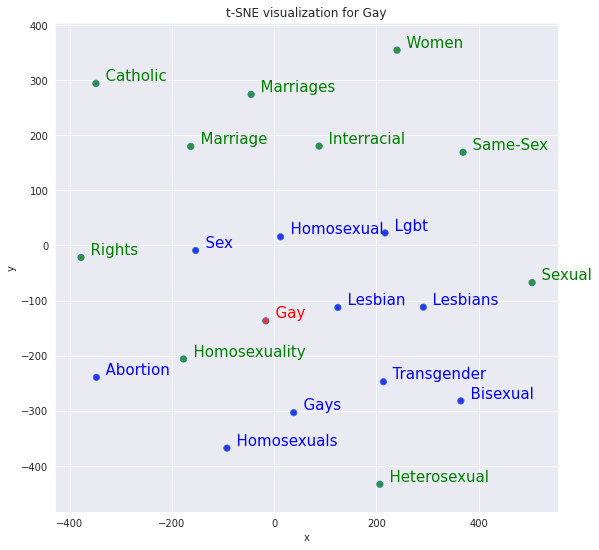

In [ ]:
tsnescatterplot(word_vectors, "gay", [t[0] for t in word_vectors.wv.most_similar(positive=["gay"], topn=20)][10:])